In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [7]:
# Make global settings for the figures.
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')


In [8]:
# import data into a pandas dataframe.
wm = pd.read_excel("../manuscript_data.xlsx", sheet_name="WMJ")
wm.head(3)


,sample,sub-Stage,height,d13C,Hg,TOC,Al,Fe,Nd143,Nd143_2se,Nd_t,Nd_2se,Sr,Sr_2se,Mn,P,Mo
0,WMJ 7C,middle Smithian,0.09,0.719940,0.2,NaN,NaN,NaN,0.512193,0.000012,-6.499195,0.241206,0.707835,0.000005,NaN,NaN,NaN
1,ISO 9,middle Smithian,0.25,0.590869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WMJ 8C,middle Smithian,0.40,-0.394212,0.3,0.013,0.011484,0.017227,NaN,NaN,NaN,NaN,0.707880,0.000032,162.3,0.097618,1.1


In [9]:
height= wm['height']
Hg =wm['Hg']
TOC = wm["TOC"]
d13C = wm["d13C"]
Sr=wm.Sr
Nd = wm.Nd_t
Nd143 = wm.Nd143

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


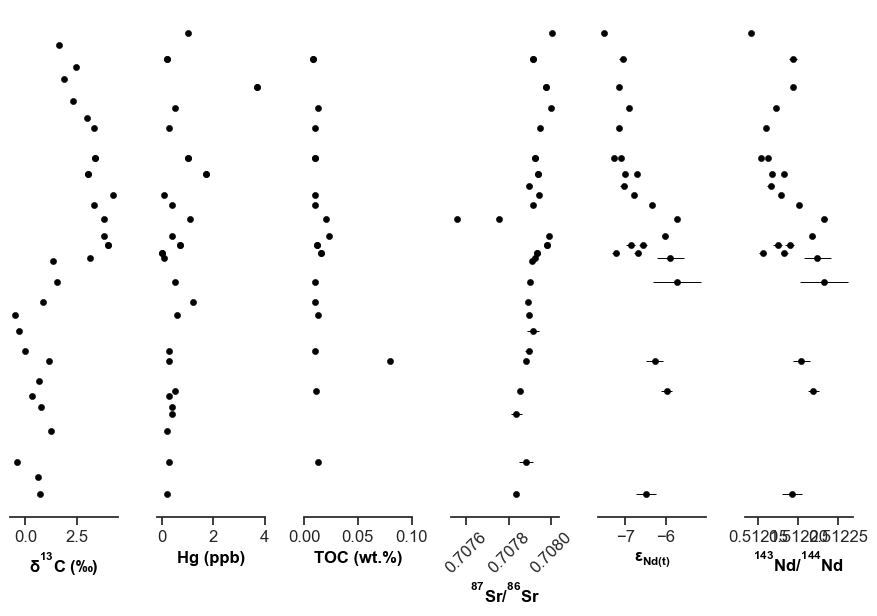

In [10]:
# Create figure and subplots.
fig, axes = plt.subplots(figsize=(9, 5.7),  # constrained_layout=True,
                         ncols=6, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes

# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
plt.tight_layout()

#define the variables needed to iterably make the figures.
subs = ['d13C', 'Hg', 'TOC',"Sr", 'Nd_t', 'Nd143']
ax= [ax0, ax1, ax2, ax3, ax4, ax5]
xlabels = ["$\delta^{13}C\;(‰)$", "Hg (ppb)", "TOC (wt.%)",
           "$^{87}Sr/^{86}Sr$", "$\epsilon_{Nd(t)}$", "$^{143}Nd/^{144}Nd$"]
err = ["Sr_2se", "Nd_2se", "Nd143_2se"]
err_subs = [Sr, Nd, Nd143]
ax_2 = [ax3, ax4, ax5]
# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=wm, x=wm[sub], y=height, ax=ax[ix],
                    color='black', legend=False, edgecolor='black',
                    s=20,
                    )
    ax[ix].tick_params(labelsize=12)
    ax[ix].set_xlabel(xlabels[ix], fontsize=12, c="black", fontweight="bold")
# ax2.set_xticks([0, .1, .2])
ax1.set_xticks([0, 2, 4])
ax2.set_xticks([0, .05, .1])
ax3.set_xticks([0.7076, 0.7078, 0.7080])
# ax4.set_xticks([-8, -7, -6])


# change orientation of the x-axis labels on the Sr isotope plot
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

# ax3.set_xticklabels(ax.get_xticks(), rotation=50)
# add error bars to Nd and Sr-isotope subplots
for ix, sub in enumerate(err):
    ax_2[ix].errorbar(xerr=wm[sub], y=height,x=err_subs[ix], ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
       
plt.savefig("../plots/WMJ_all.pdf", dpi=600)